# DMML exam: 2023-06-14

This dataset is originally taken from the Wageningen University & Research Biotechnology Department.


The **objective of the dataset is to diagnostically predict whether or not a patient has Coeliac disease**, based on certain diagnostic measurements included in the dataset. The dataset consists of several medical variables like age, gender, Diabetes type and so on, and one target variable.


1. Age: subject's age - *numeric*
2. Gender: subject's gender - *nominal* 
3. Diabetes: whether the subject has diabetes or not - *boolean*
4. Diabetes Type: diabetes type (Type 1, Type 2, None) - *nominal*
5. Diarrhoea: type of this symptom - *nominal*
6. Abdominal: whether the subject has abdominal pain or not  - *boolean*
7. Short_Stature: type of short stature disorder (Proportionate short stature (PSS) is when the person is small, but all the parts are in the usual proportions. In disproportionate short stature (DSS), the limbs may be small compared with the trunk. Sometimes a person is small but otherwise healthy. This can be referred to as variant restricted growth. It may happen for genetic or hormonal reasons.) - *nominal*
8. Sticky_Stool: whether the subject suffers from this symptom or not   - *boolean*
9. Weight_loss: whether the subject suffers from this symptom or not  - *boolean*
10. IgA: Immunoglobulin A concentration [u/ml] - *numeric*
11. IgG: Immunoglobulin G concentration [u/ml] - *numeric*
12. IgM: Immunoglobulin M concentration [u/ml] - *numeric* 
13. Marsh: score of damage of gluten on small intestine (none,type0,type1,type2,type3a,type3b,type3c) -*ordinal*
14. cd_type: coeliac disease type -*nominal*
15. Disease-diagnose (**CLASS**):  whether the subject suffers from Coeliac disease or not -*boolean*

# Instructions summary
1. Import the *coeliac_disease.csv* dataset
    - Drop "Marsh" and "cd_type" columns
2. Perform an **exploratory analysis**:
    - Report and discuss the results of the analysis, using dedicated markdown cells
3. Perform the required data preprocessing steps:
    - Obtain a numeric representation of the categorical variables
4. Carry out a **classification analysis** aimed at predicting **Disease_Diagnose** considering the following setting:
    - Apply a 10-fold cross-validation procedure on the dataset to identify the most suitable classifier among the following:
        - DecisionTree classifier (setting the maximum depth equal to 6)
        - KNearestNeighbor classifier (default params)
        - KNearestNeighbor classifier (default params) after feature selection targeted at keeping 10 features
    - Report and discuss the results, motivating the choice of the most suitable model (using dedicated markdown cells)
5. Inference:
    - Train the selected model on the overall training set 
    - Classfy the following unseen record, taking care of adequately preprocessing it:
    ```python
    unseen_record = pd.DataFrame({'Age':8,
                         'Gender':'Male', 
                         'Diabetes':'Yes', 
                         'Diabetes Type':'Type 1', 
                         'Diarrhoea':'watery', 
                         'Abdominal':'yes', 
                         'Short_Stature':'PSS', 
                         'Sticky_Stool':'yes', 
                         'Weight_loss':'yes', 
                         'IgA':1.66,
                         'IgG':8.0,
                         'IgM':2.0}, index = [1])                                 
    ```
# Exam Delivery
- Save the current file 
- Click "**Restart & Run All**" and check consistency (no error, expected results)
- Export using
     - "**File**" --> "**Download as**" --> "**HTML (.html)**"
- Rename the files as follows and upload in MS Teams Assignment (**be sure to upload the files**, after attaching them)
     - HTML: *Surname_Name_StudentNumber.html*
     - IPYNB: *Surname_Name_StudentNumber.ipynb* 
     
# Code of conduct
- You can consult the course material (notebooks and slides)
- You can consult the official documentation of the libraries
- Any form of information leakage between candidates is not allowed: if this is ascertained, exam failure is automatic.

# 1. Import the *coeliac_disease.csv* dataset

In [1]:
# TODO 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('coeliac_disease.csv')

In [3]:
df

,Age,Gender,Diabetes,Diabetes Type,Diarrhoea,Abdominal,Short_Stature,Sticky_Stool,Weight_loss,IgA,IgG,IgM,Marsh,cd_type,Disease_Diagnose
0,10,Male,Yes,Type 1,inflammatory,yes,PSS,no,no,1.30,10.0,1.00,marsh type 0,potential,yes
1,9,Male,Yes,Type 1,fatty,yes,PSS,no,no,1.50,12.5,1.30,marsh type 3a,atypical,yes
2,8,Female,Yes,Type 1,watery,yes,Variant,yes,yes,0.40,8.0,0.50,marsh type 1,latent,yes
3,10,Male,Yes,Type 1,watery,yes,PSS,no,no,0.98,9.0,0.66,marsh type 3a,silent,yes
4,9,Male,Yes,Type 1,fatty,yes,PSS,no,no,1.00,10.5,1.10,marsh type 1,latent,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,3,Male,Yes,Type 1,fatty,yes,PSS,yes,no,1.10,7.0,0.60,marsh type 2,typical,yes
2202,11,Female,Yes,Type 1,watery,yes,PSS,yes,no,1.40,12.0,1.10,none,none,no
2203,15,Male,Yes,Type 1,watery,yes,PSS,yes,no,0.34,10.0,0.60,marsh type 0,potential,yes
2204,7,Female,no,NaN,fatty,yes,DSS,yes,yes,2.10,8.5,2.10,none,none,no


In [4]:
df.drop(['Marsh', 'cd_type'], axis=1, inplace=True)
df

,Age,Gender,Diabetes,Diabetes Type,Diarrhoea,Abdominal,Short_Stature,Sticky_Stool,Weight_loss,IgA,IgG,IgM,Disease_Diagnose
0,10,Male,Yes,Type 1,inflammatory,yes,PSS,no,no,1.30,10.0,1.00,yes
1,9,Male,Yes,Type 1,fatty,yes,PSS,no,no,1.50,12.5,1.30,yes
2,8,Female,Yes,Type 1,watery,yes,Variant,yes,yes,0.40,8.0,0.50,yes
3,10,Male,Yes,Type 1,watery,yes,PSS,no,no,0.98,9.0,0.66,yes
4,9,Male,Yes,Type 1,fatty,yes,PSS,no,no,1.00,10.5,1.10,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,3,Male,Yes,Type 1,fatty,yes,PSS,yes,no,1.10,7.0,0.60,yes
2202,11,Female,Yes,Type 1,watery,yes,PSS,yes,no,1.40,12.0,1.10,no
2203,15,Male,Yes,Type 1,watery,yes,PSS,yes,no,0.34,10.0,0.60,yes
2204,7,Female,no,NaN,fatty,yes,DSS,yes,yes,2.10,8.5,2.10,no


# 2. Perform an **exploratory analysis**
- Report and discuss the results of the analysis.



In [5]:
# TODO
df.shape

(2206, 13)

In [6]:
df.head(8).T

,0,1,2,3,4,5,6,7
Age,10,9,8,10,9,8,9,5
Gender,Male,Male,Female,Male,Male,Female,Male,Female
Diabetes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
Diabetes Type,Type 1,Type 1,Type 1,Type 1,Type 1,Type 1,Type 1,Type 1
Diarrhoea,inflammatory,fatty,watery,watery,fatty,fatty,watery,fatty
Abdominal,yes,yes,yes,yes,yes,yes,yes,yes
Short_Stature,PSS,PSS,Variant,PSS,PSS,Variant,Variant,PSS
Sticky_Stool,no,no,yes,no,no,yes,yes,yes
Weight_loss,no,no,yes,no,no,yes,yes,yes
IgA,1.3,1.5,0.4,0.98,1.0,1.1,2.1,0.8


In [7]:
df.tail(8).T

,2198,2199,2200,2201,2202,2203,2204,2205
Age,6,10,9,3,11,15,7,12
Gender,Male,Male,Female,Male,Female,Male,Female,Female
Diabetes,Yes,Yes,Yes,Yes,Yes,Yes,no,Yes
Diabetes Type,Type 1,Type 1,Type 1,Type 1,Type 1,Type 1,NaN,Type 1
Diarrhoea,inflammatory,fatty,inflammatory,fatty,watery,watery,fatty,inflammatory
Abdominal,yes,yes,yes,yes,yes,yes,yes,yes
Short_Stature,PSS,Variant,PSS,PSS,PSS,PSS,DSS,Variant
Sticky_Stool,yes,yes,yes,yes,yes,yes,yes,yes
Weight_loss,yes,yes,yes,no,no,no,yes,yes
IgA,0.51,1.8,1.3,1.1,1.4,0.34,2.1,1.9


In [8]:
df['Abdominal'].value_counts()

Abdominal
yes    1781
no      425
Name: count, dtype: int64

In [9]:
df['Diabetes Type'].value_counts()

Diabetes Type
Type 1    1663
Type 2     125
Name: count, dtype: int64

In [10]:
df.describe()

,Age,IgA,IgG,IgM
count,2206.000000,2206.000000,2206.000000,2206.000000
mean,12.768812,1.427384,10.052901,1.236963
std,7.434250,1.110042,2.047683,0.447216
min,1.000000,0.340000,5.000000,0.500000
25%,8.000000,1.000000,8.700000,0.980000
50%,10.000000,1.100000,10.000000,1.100000
75%,15.000000,1.800000,12.000000,1.500000
max,35.000000,9.000000,15.300000,2.700000


the maxium age is 35 and the mean is 12, meaning that this dataset analyzed prevalently children's data. 

In [11]:
df.describe(include='object')

,Gender,Diabetes,Diabetes Type,Diarrhoea,Abdominal,Short_Stature,Sticky_Stool,Weight_loss,Disease_Diagnose
count,2206,2206,1788,2206,2206,2206,2206,2206,2206
unique,2,2,2,3,2,3,2,2,2
top,Male,Yes,Type 1,fatty,yes,PSS,yes,yes,yes
freq,1122,1829,1663,773,1781,959,1820,1514,1843


from the count row i can see that in Diabetes Type there are some missing values, let's explore it.

In [12]:
df.isna().values.any()

True

In [13]:
df.isna().sum(axis=0)

Age                   0
Gender                0
Diabetes              0
Diabetes Type       418
Diarrhoea             0
Abdominal             0
Short_Stature         0
Sticky_Stool          0
Weight_loss           0
IgA                   0
IgG                   0
IgM                   0
Disease_Diagnose      0
dtype: int64

let's address the missing value, by checking in this case the mode between type 1 and type 2 diabetes and assign it to the NaN values

In [14]:
df['Diabetes Type'].mode()[0]

'Type 1'

In [15]:
df['Diabetes Type'].value_counts()

Diabetes Type
Type 1    1663
Type 2     125
Name: count, dtype: int64

In [16]:
df['Diabetes Type'].fillna(df['Diabetes Type'].mode()[0], inplace=True)

In [17]:
df['Diabetes Type'].unique()

array(['Type 1', 'Type 2'], dtype=object)

In [18]:
df.isna().sum(axis=0)

Age                 0
Gender              0
Diabetes            0
Diabetes Type       0
Diarrhoea           0
Abdominal           0
Short_Stature       0
Sticky_Stool        0
Weight_loss         0
IgA                 0
IgG                 0
IgM                 0
Disease_Diagnose    0
dtype: int64

In [19]:
df['Disease_Diagnose']

0       yes
1       yes
2       yes
3       yes
4       yes
       ... 
2201    yes
2202     no
2203    yes
2204     no
2205     no
Name: Disease_Diagnose, Length: 2206, dtype: object

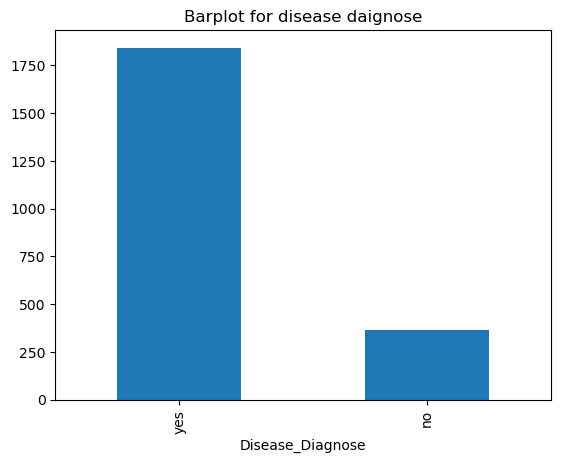

In [20]:
count=df['Disease_Diagnose'].value_counts()
count.plot(kind='bar',
       title='Barplot for disease daignose')
plt.show()

<Axes: xlabel='Disease_Diagnose', ylabel='Count'>

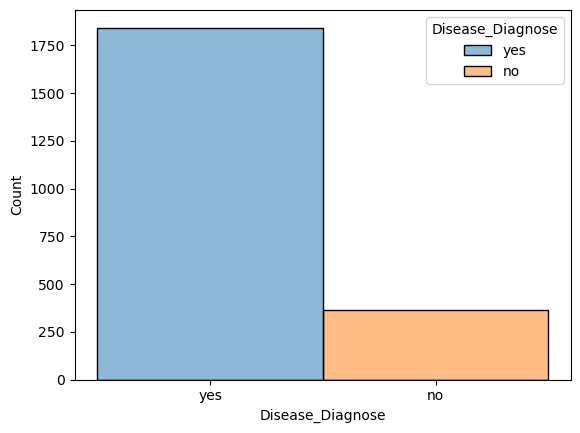

In [21]:
sns.histplot(data=df, x='Disease_Diagnose', hue='Disease_Diagnose')

<Axes: ylabel='count'>

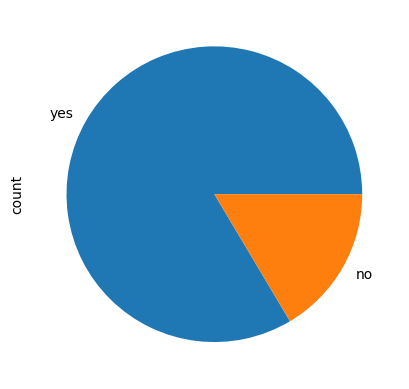

In [22]:
df["Disease_Diagnose"].value_counts().plot.pie()

In [23]:
df.describe()

,Age,IgA,IgG,IgM
count,2206.000000,2206.000000,2206.000000,2206.000000
mean,12.768812,1.427384,10.052901,1.236963
std,7.434250,1.110042,2.047683,0.447216
min,1.000000,0.340000,5.000000,0.500000
25%,8.000000,1.000000,8.700000,0.980000
50%,10.000000,1.100000,10.000000,1.100000
75%,15.000000,1.800000,12.000000,1.500000
max,35.000000,9.000000,15.300000,2.700000


In [24]:
#FOR NOMINAL NO ORDER, FOR ORDINAL YES ORDER
#the only ordinal variable, which was Marsh, I dropped it (so no order)
numerical= ['Age', 'IgA', 'IgG', 'IgM']
nominal= list(set(df)-set((numerical)+ ['Disease_Diagnose']))

In [25]:
nominal

['Short_Stature',
 'Weight_loss',
 'Diabetes Type',
 'Diarrhoea',
 'Sticky_Stool',
 'Gender',
 'Diabetes',
 'Abdominal']

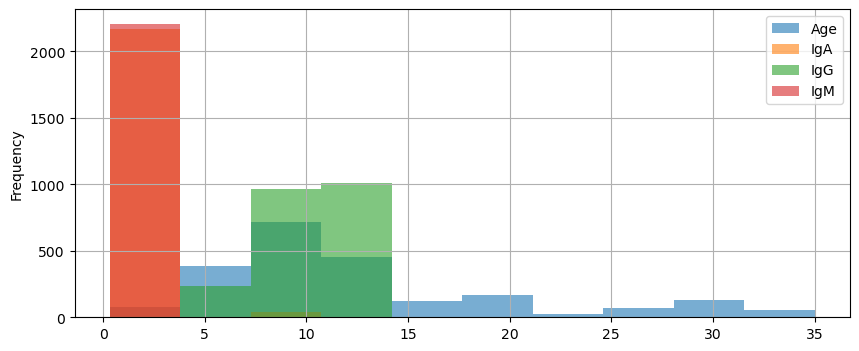

In [26]:
df[numerical].plot(kind='hist',
                  grid=True,
                  alpha=0.6,
                  bins=10,
                  figsize=(10,4))
plt.show()

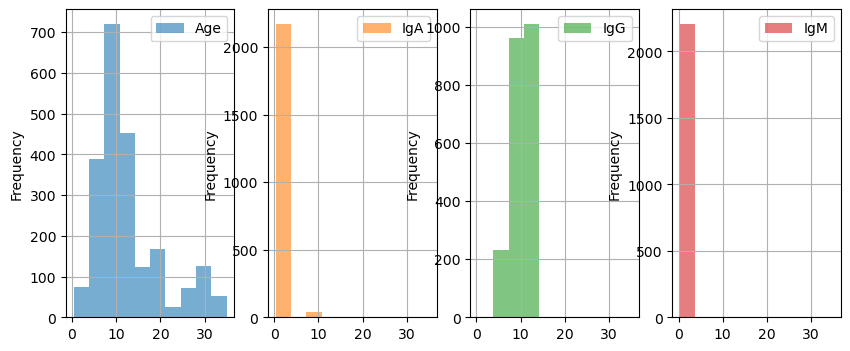

In [27]:
df[numerical].plot(kind='hist',
                  grid=True,
                  alpha=0.6,
                  bins=10,
                  figsize=(10,4),
                  subplots=True,
                  layout=(1,4))
plt.show()

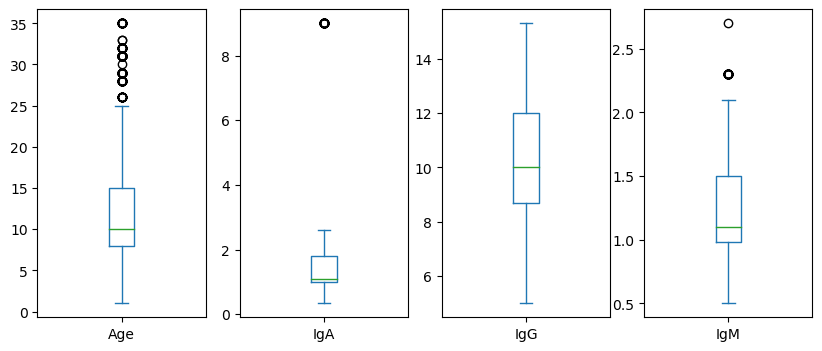

In [28]:
df[numerical].plot(kind='box',
                   layout=(1,4),
                  subplots=True,
                  figsize=(10,4))
plt.show()

<Axes: >

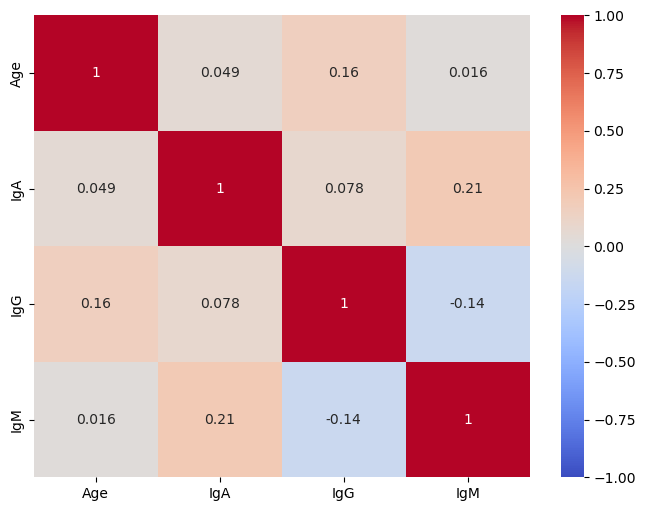

In [29]:
plt.figure(figsize= (8, 6))
sns.heatmap(df[numerical].corr(), annot = True, vmin=-1, vmax=1,cmap = "coolwarm")

I don't see any highly correlated variables, I wouldn't drop any of them

In [30]:
df[numerical].corr()

,Age,IgA,IgG,IgM
Age,1.000000,0.048976,0.157087,0.016167
IgA,0.048976,1.000000,0.078237,0.207508
IgG,0.157087,0.078237,1.000000,-0.135491
IgM,0.016167,0.207508,-0.135491,1.000000


In [31]:
df[nominal]

,Short_Stature,Weight_loss,Diabetes Type,Diarrhoea,Sticky_Stool,Gender,Diabetes,Abdominal
0,PSS,no,Type 1,inflammatory,no,Male,Yes,yes
1,PSS,no,Type 1,fatty,no,Male,Yes,yes
2,Variant,yes,Type 1,watery,yes,Female,Yes,yes
3,PSS,no,Type 1,watery,no,Male,Yes,yes
4,PSS,no,Type 1,fatty,no,Male,Yes,yes
...,...,...,...,...,...,...,...,...
2201,PSS,no,Type 1,fatty,yes,Male,Yes,yes
2202,PSS,no,Type 1,watery,yes,Female,Yes,yes
2203,PSS,no,Type 1,watery,yes,Male,Yes,yes
2204,DSS,yes,Type 1,fatty,yes,Female,no,yes


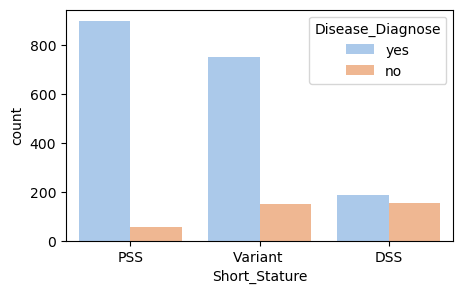

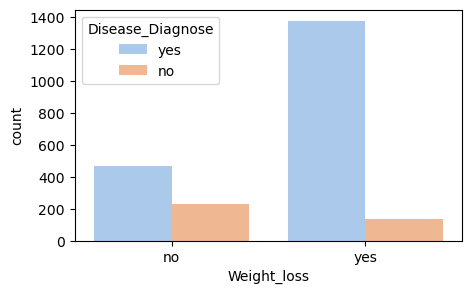

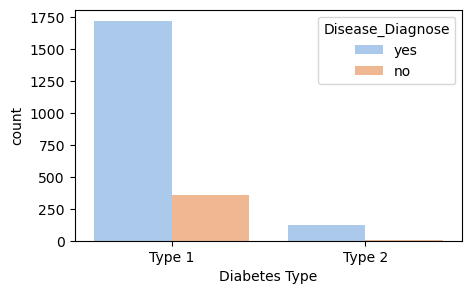

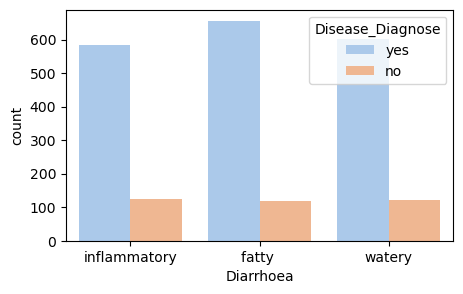

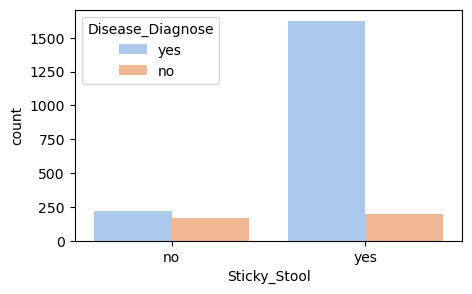

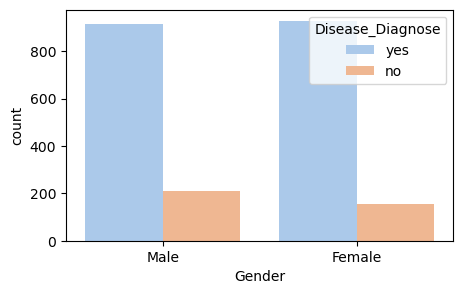

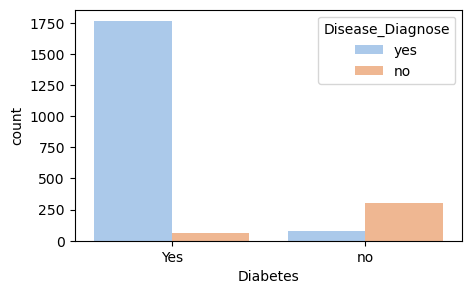

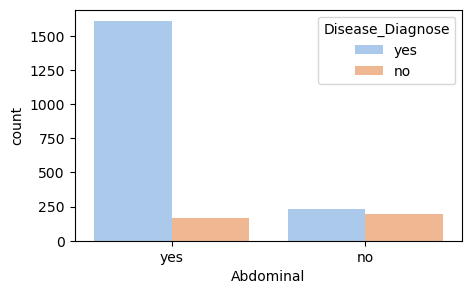

In [32]:
for col in nominal:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, data=df, hue='Disease_Diagnose', palette='pastel')
    plt.show()

all the variables seem to have a high influence on the target variable.
the Gender seems to not have an influence on the diagnose, as well as the type of diarrhea.

# 3. Perform the required data preprocessing steps 
- Obtain a numeric representation of the categorical variables.


In [33]:
# TODO
df[nominal]

,Short_Stature,Weight_loss,Diabetes Type,Diarrhoea,Sticky_Stool,Gender,Diabetes,Abdominal
0,PSS,no,Type 1,inflammatory,no,Male,Yes,yes
1,PSS,no,Type 1,fatty,no,Male,Yes,yes
2,Variant,yes,Type 1,watery,yes,Female,Yes,yes
3,PSS,no,Type 1,watery,no,Male,Yes,yes
4,PSS,no,Type 1,fatty,no,Male,Yes,yes
...,...,...,...,...,...,...,...,...
2201,PSS,no,Type 1,fatty,yes,Male,Yes,yes
2202,PSS,no,Type 1,watery,yes,Female,Yes,yes
2203,PSS,no,Type 1,watery,yes,Male,Yes,yes
2204,DSS,yes,Type 1,fatty,yes,Female,no,yes


In [34]:
df['Diabetes'].replace('Yes', 'yes', inplace=True)

In [35]:
df[nominal]

,Short_Stature,Weight_loss,Diabetes Type,Diarrhoea,Sticky_Stool,Gender,Diabetes,Abdominal
0,PSS,no,Type 1,inflammatory,no,Male,yes,yes
1,PSS,no,Type 1,fatty,no,Male,yes,yes
2,Variant,yes,Type 1,watery,yes,Female,yes,yes
3,PSS,no,Type 1,watery,no,Male,yes,yes
4,PSS,no,Type 1,fatty,no,Male,yes,yes
...,...,...,...,...,...,...,...,...
2201,PSS,no,Type 1,fatty,yes,Male,yes,yes
2202,PSS,no,Type 1,watery,yes,Female,yes,yes
2203,PSS,no,Type 1,watery,yes,Male,yes,yes
2204,DSS,yes,Type 1,fatty,yes,Female,no,yes


In [36]:
diz_yn= {'yes':0, 'no':1}
diz_gender= {'Male':0, 'Female':1}


In [37]:
df['Abdominal']= df['Abdominal'].apply(lambda x: diz_yn[x])
df['Sticky_Stool']= df['Sticky_Stool'].apply(lambda x: diz_yn[x])
df['Diabetes']= df['Diabetes'].apply(lambda x: diz_yn[x])
df['Weight_loss']= df['Weight_loss'].apply(lambda x: diz_yn[x])

In [38]:
df[nominal]

,Short_Stature,Weight_loss,Diabetes Type,Diarrhoea,Sticky_Stool,Gender,Diabetes,Abdominal
0,PSS,1,Type 1,inflammatory,1,Male,0,0
1,PSS,1,Type 1,fatty,1,Male,0,0
2,Variant,0,Type 1,watery,0,Female,0,0
3,PSS,1,Type 1,watery,1,Male,0,0
4,PSS,1,Type 1,fatty,1,Male,0,0
...,...,...,...,...,...,...,...,...
2201,PSS,1,Type 1,fatty,0,Male,0,0
2202,PSS,1,Type 1,watery,0,Female,0,0
2203,PSS,1,Type 1,watery,0,Male,0,0
2204,DSS,0,Type 1,fatty,0,Female,1,0


In [39]:
df['Gender']= df['Gender'].apply(lambda x: diz_gender[x])
df[nominal]

,Short_Stature,Weight_loss,Diabetes Type,Diarrhoea,Sticky_Stool,Gender,Diabetes,Abdominal
0,PSS,1,Type 1,inflammatory,1,0,0,0
1,PSS,1,Type 1,fatty,1,0,0,0
2,Variant,0,Type 1,watery,0,1,0,0
3,PSS,1,Type 1,watery,1,0,0,0
4,PSS,1,Type 1,fatty,1,0,0,0
...,...,...,...,...,...,...,...,...
2201,PSS,1,Type 1,fatty,0,0,0,0
2202,PSS,1,Type 1,watery,0,1,0,0
2203,PSS,1,Type 1,watery,0,0,0,0
2204,DSS,0,Type 1,fatty,0,1,1,0


In [40]:
col=['Diarrhoea', 'Diabetes Type', 'Short_Stature']
x_t= df.drop(['Disease_Diagnose'], axis=1)
y_t= df['Disease_Diagnose']

In [41]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
encoded=enc.fit_transform(x_t[col]).toarray()
x_t1= pd.DataFrame(encoded, columns=enc.get_feature_names_out(col))

In [42]:
x_t= pd.concat([x_t, x_t1], axis=1)
x_t=x_t.drop(col, axis=1)
x_t

,Age,Gender,Diabetes,Abdominal,Sticky_Stool,Weight_loss,IgA,IgG,IgM,Diarrhoea_fatty,Diarrhoea_inflammatory,Diarrhoea_watery,Diabetes Type_Type 1,Diabetes Type_Type 2,Short_Stature_DSS,Short_Stature_PSS,Short_Stature_Variant
0,10,0,0,0,1,1,1.30,10.0,1.00,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,9,0,0,0,1,1,1.50,12.5,1.30,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,8,1,0,0,0,0,0.40,8.0,0.50,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,10,0,0,0,1,1,0.98,9.0,0.66,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,9,0,0,0,1,1,1.00,10.5,1.10,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,3,0,0,0,0,1,1.10,7.0,0.60,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2202,11,1,0,0,0,1,1.40,12.0,1.10,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2203,15,0,0,0,0,1,0.34,10.0,0.60,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2204,7,1,1,0,0,0,2.10,8.5,2.10,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0



# 4. Carry out a **classification analysis** aimed at predicting **Disease_Diagnose** considering the following setting
- Apply a 10-fold cross-validation procedure on the dataset to identify the most suitable classifier among the following:
    - DecisionTree classifier (maximum depth equal to 6)
    - KNearestNeighbor classifier (default params)
    - KNearestNeighbor classifier (default params) after feature selection targeted at keeping 10 features
- Report and discuss the results, motivating the choice of the most suitable model


In [ ]:
#fardin solution
one_hot_transformer = OneHotEncoder()
Robust_scaler = RobustScaler()


preprocessor = ColumnTransformer(
    [
        ("onehot_encoding", one_hot_transformer, categorical_cols),
        ("scaling", Robust_scaler, numerical_cols)
    ]
)

#REPEAT THE FOLLOWING STEPS FOR EVERY CLASSIFIER
dtc = ImbPipeline([
    ('preprocessor', preprocessor),
    ("SMOTE", SMOTE(random_state = 42)),
    ("decision_tree", DecisionTreeClassifier(max_depth = 6))
])
dct.fit(X,y)

strat_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_pred = cross_val_predict(dtc, X, y, cv=strat_kfold, n_jobs=-1)

ConfusionMatrixDisplay.from_predictions(y, y_pred,values_format = '')
plt.show()

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay


RocCurveDisplay.from_estimator(dtc, X, y, marker = 'o')
plt.title("Receiver Operating Characteristic (ROC) curves")
plt.grid(linestyle="--")
plt.show()


In [43]:
# TODO
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
import os
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [44]:
def extract_x_y(filename):
    # here we perform all the "cleaning" steps. We assume that this transformation can be safely applied both on the training and test sets.
    df = pd.read_csv(filename)
    df['Diabetes']= df['Diabetes'].replace('Yes', 'yes')
    df['Abdominal']= df['Abdominal'].apply(lambda x: diz_yn[x])
    df['Sticky_Stool']= df['Sticky_Stool'].apply(lambda x: diz_yn[x])
    df['Diabetes']= df['Diabetes'].apply(lambda x: diz_yn[x])
    df['Weight_loss']= df['Weight_loss'].apply(lambda x: diz_yn[x])
    df['Gender']= df['Gender'].apply(lambda x: diz_gender[x])
    col=['Diarrhoea', 'Diabetes Type', 'Short_Stature']
    x_t= df.drop(['Disease_Diagnose'], axis=1)
    y_t= df['Disease_Diagnose']
    from sklearn.preprocessing import OneHotEncoder
    enc=OneHotEncoder()
    encoded=enc.fit_transform(x_t[col]).toarray()
    x_t1= pd.DataFrame(encoded, columns=enc.get_feature_names_out(col))
    x_t= pd.concat([x_t, x_t1], axis=1)
    x_t=x_t.drop(col, axis=1)
    
    return x_t, y_t
    
x_tr, y_tr = extract_x_y('coeliac_disease.csv')

In [45]:
def eval_cross_validation(pipeline, X, y):
    list_df = []
    list_accuracy = []
    for train, val in skf.split(X, y):
        # fit and predict using pipeline
        X_tr = X.values[train]#9 k-1
        y_tr = y.values[train]
        X_val = X.values[val]#1
        y_val = y.values[val]
        pipeline.fit(X_tr,y_tr)
        y_pred = pipeline.predict(X_val)
        # compute classification report
        cr = classification_report(y_val, y_pred, output_dict = True, zero_division = np.nan)
        # store accuracy
        list_accuracy.append(cr['accuracy'])
        # store per-class metrics as a dataframe
        df = pd.DataFrame({k:v for k,v in cr.items() if k!='accuracy'})
        list_df.append(df)
    
    # compute average per-class metrics    
    df_concat = pd.concat(list_df)
    by_row_index = df_concat.groupby(df_concat.index)
    df_avg = by_row_index.mean().round(3)

    # compute average accuracy
    accuracy_avg = np.mean(list_accuracy)
    
    return df_avg, accuracy_avg

In [46]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, make_scorer, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

accuracy 0.9660098724804607


,no,yes,macro avg,weighted avg
f1-score,0.886,0.980,0.933,0.965
precision,0.974,0.965,0.969,0.966
recall,0.816,0.996,0.906,0.966
support,36.300,184.300,220.600,220.600


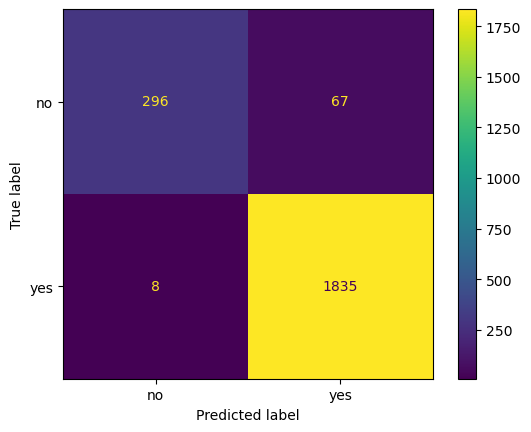

In [47]:
estimators = [('missing', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
              ('scaler',StandardScaler()),
              ('clf', DecisionTreeClassifier(random_state=123, max_depth=6) )]
pipe_dt = Pipeline(estimators)
df_metrics, acc = eval_cross_validation(pipe_dt, x_t, y_t)

print('accuracy',acc)
display(df_metrics)
y_pred = cross_val_predict(pipe_dt, x_t, y_t, cv=skf)
ConfusionMatrixDisplay.from_predictions(y_t, y_pred)
plt.show()

In [48]:
a1=acc

In [49]:
dt = cross_val_score(pipe_dt, x_t, y_t, scoring = make_scorer(f1_score, pos_label='yes'), cv = skf)
dt, dt.mean()

(array([0.98659517, 0.97612732, 0.97883598, 0.97612732, 0.97082228,
        0.98123324, 0.99728997, 0.97849462, 0.976     , 0.97860963]),
 0.9800135542367558)

C:\Users\chiar\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\chiar\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


accuracy 0.9592143150966679


,no,yes,macro avg,weighted avg
f1-score,0.858,0.976,0.917,0.957
precision,0.986,0.956,0.971,0.961
recall,0.763,0.998,0.880,0.959
support,36.300,184.300,220.600,220.600


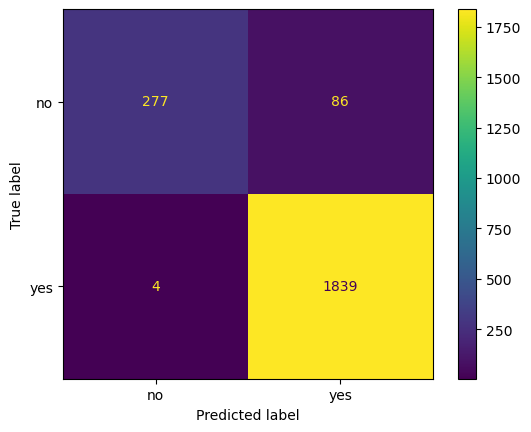

In [50]:
estimators = [('missing', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
              ('scaler',StandardScaler()),
              ('knn', KNeighborsClassifier(n_neighbors=5))]
pipe_knn = Pipeline(estimators)
df_metrics, acc = eval_cross_validation(pipe_knn, x_t, y_t)

print('accuracy',acc)
display(df_metrics)
y_pred = cross_val_predict(pipe_knn, x_t, y_t, cv=skf)
ConfusionMatrixDisplay.from_predictions(y_t, y_pred)
plt.show()

In [51]:
a2=acc

In [52]:
knn = cross_val_score(pipe_knn, x_t, y_t, scoring = make_scorer(f1_score, pos_label='yes'), cv = skf)
knn, knn.mean()

(array([0.976     , 0.96587927, 0.97112861, 0.9787234 , 0.97097625,
        0.9787234 , 0.99459459, 0.97097625, 0.97612732, 0.97860963]),
 0.9761738730340642)

accuracy 0.9646462361168243


,no,yes,macro avg,weighted avg
f1-score,0.882,0.979,0.931,0.963
precision,0.971,0.964,0.967,0.965
recall,0.810,0.995,0.903,0.965
support,36.300,184.300,220.600,220.600


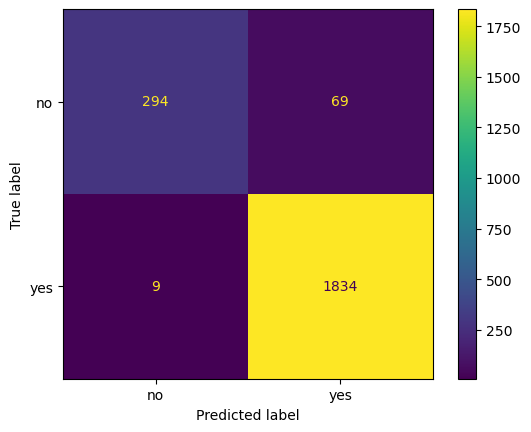

In [53]:
from sklearn.feature_selection import SelectKBest
SelectKBest?
estimators = [('missing', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
              ('scaler',StandardScaler()),
              ('fsel', SelectKBest()),
              ('knn', KNeighborsClassifier(n_neighbors=5))]
pipe_knn_best = Pipeline(estimators)
df_metrics, acc = eval_cross_validation(pipe_knn_best, x_t, y_t)

print('accuracy',acc)
display(df_metrics)
y_pred = cross_val_predict(pipe_knn_best, x_t, y_t, cv=skf)
ConfusionMatrixDisplay.from_predictions(y_t, y_pred)
plt.show()

In [54]:
a3=acc

In [55]:
knn_best = cross_val_score(pipe_knn_best, x_t, y_t, scoring = make_scorer(f1_score, pos_label='yes'), cv = skf)
knn_best, knn_best.mean()

(array([0.98659517, 0.97340426, 0.97883598, 0.9787234 , 0.97354497,
        0.97849462, 0.99459459, 0.97587131, 0.976     , 0.976     ]),
 0.9792064318141585)

In [56]:
evaluation_results= pd.DataFrame({'dt': dt, 'knn': knn, 'knn_f_sel': knn_best})
evaluation_results

,dt,knn,knn_f_sel
0,0.986595,0.976000,0.986595
1,0.976127,0.965879,0.973404
2,0.978836,0.971129,0.978836
3,0.976127,0.978723,0.978723
4,0.970822,0.970976,0.973545
5,0.981233,0.978723,0.978495
6,0.997290,0.994595,0.994595
7,0.978495,0.970976,0.975871
8,0.976000,0.976127,0.976000
9,0.978610,0.978610,0.976000


Text(0, 0.5, 'Disease_Diagnose')

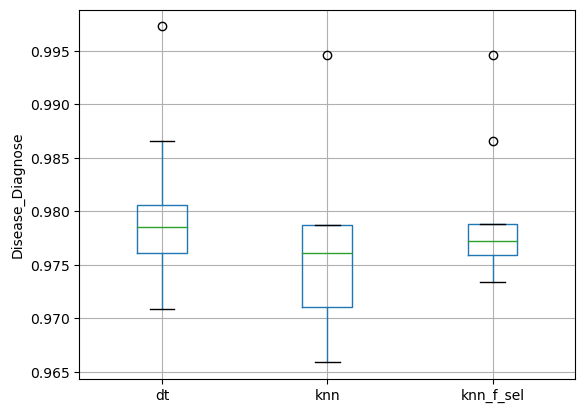

In [57]:
#to visualize the results
bplot=evaluation_results.boxplot()
bplot.set_ylabel('Disease_Diagnose')

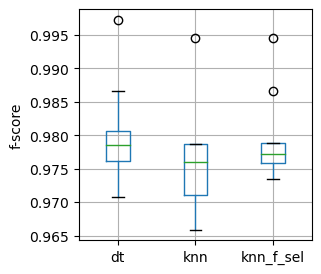

In [58]:
from matplotlib import pyplot as plt
ax= evaluation_results.boxplot(figsize=(3,3))
ax.set_ylabel('f-score')
plt.show()

In [59]:
from scipy.stats import wilcoxon

In [60]:
print(wilcoxon(evaluation_results.dt, evaluation_results.knn))
print(wilcoxon(evaluation_results.dt, evaluation_results.knn_f_sel))
print(wilcoxon(evaluation_results.knn_f_sel, evaluation_results.knn))

WilcoxonResult(statistic=7.0, pvalue=0.0663160312989308)
WilcoxonResult(statistic=6.0, pvalue=0.17629637444051116)
WilcoxonResult(statistic=7.0, pvalue=0.12348527214454898)


C:\Users\chiar\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\chiar\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


given a confidence level of alpha= 0.05, since the p-value> alpha, the null  hypothesis can be acceppted (the paired samples come from the same distribution).

We can conclude that, based on the chosen classification metric (f1-score), the pipeline with decision tree is the most suitable for out model

# 5. Inference
- Train the selected model on the overall training set 
- Classfy the following unseen record, taking care of adequately preprocessing it:
```python
unseen_record = pd.DataFrame({'Age':8,
                     'Gender':'Male', 
                     'Diabetes':'Yes', 
                     'Diabetes Type':'Type 1', 
                     'Diarrhoe':'watery', 
                     'Abdominal':'yes', 
                     'Short_Stature':'PSS', 
                     'Sticky_Stool':'yes', 
                     'Weight_loss':'yes', 
                     'IgA':1.66,
                     'IgG':8.0,
                     'IgM':2.0},
                     index = [1])                                 
```

In [61]:
import os
data= pd.DataFrame({'Age':8,
                     'Gender':'Male', 
                     'Diabetes':'Yes', 
                     'Diabetes Type':'Type 1', 
                     'Diarrhoea':'watery', 
                     'Abdominal':'yes', 
                     'Short_Stature':'PSS', 
                     'Sticky_Stool':'yes', 
                     'Weight_loss':'yes', 
                     'IgA':1.66,
                     'IgG':8.0,
                     'IgM':2.0},
                     index= [1])

filename= 'coeliac_test.csv'
output_directory="C:/users/chiar/DATA MINING EXERCISES"
file_path= os.path.join(output_directory, filename)

data.to_csv(file_path, index=False)

print(f' DataFrame saved in {file_path}')

 DataFrame saved in C:/users/chiar/DATA MINING EXERCISES\coeliac_test.csv


In [62]:
df= pd.read_csv(file_path)
df

,Age,Gender,Diabetes,Diabetes Type,Diarrhoea,Abdominal,Short_Stature,Sticky_Stool,Weight_loss,IgA,IgG,IgM
0,8,Male,Yes,Type 1,watery,yes,PSS,yes,yes,1.66,8.0,2.0


In [63]:
def extract_x_y(filename):
    # here we perform all the "cleaning" steps. We assume that this transformation can be safely applied both on the training and test sets.
    df = pd.read_csv(filename)
    df['Diabetes']= df['Diabetes'].replace('Yes', 'yes')
    df['Abdominal']= df['Abdominal'].apply(lambda x: diz_yn[x])
    df['Sticky_Stool']= df['Sticky_Stool'].apply(lambda x: diz_yn[x])
    df['Diabetes']= df['Diabetes'].apply(lambda x: diz_yn[x])
    df['Weight_loss']= df['Weight_loss'].apply(lambda x: diz_yn[x])
    df['Gender']= df['Gender'].apply(lambda x: diz_gender[x])
    col=['Diarrhoea', 'Diabetes Type', 'Short_Stature']
    x_t= df
    from sklearn.preprocessing import OneHotEncoder
    enc=OneHotEncoder()
    encoded=enc.fit_transform(x_t[col]).toarray()
    x_t1= pd.DataFrame(encoded, columns=enc.get_feature_names_out(col))
    x_t= pd.concat([x_t, x_t1], axis=1)
    x_t=x_t.drop(col, axis=1)
    
    return x_t
    
x_te = extract_x_y('coeliac_test.csv')

In [64]:
x_te

,Age,Gender,Diabetes,Abdominal,Sticky_Stool,Weight_loss,IgA,IgG,IgM,Diarrhoea_watery,Diabetes Type_Type 1,Short_Stature_PSS
0,8,0,0,0,0,0,1.66,8.0,2.0,1.0,1.0,1.0


In [ ]:
#fardin solution
preprocessor.transform(unseen_record)

dtc.predict(unseen_record)

In [65]:
test = pd.DataFrame({'Age':8,
                     'Gender':1, 
                     'Diabetes':1,
                     'Abdominal':1,
                     'Sticky_Stool':1,
                     'Weight_loss':1,
                     'IgA':1.66,
                     'IgG':8.0,
                     'IgM':2.0,
                     'Diarrhoea_fatty ':0,
                     'Diarrhoea_inflammatory':0,
                     'Diarrhoea_watery':1,
                     'Diabetes Type_Type 1':1,
                     'Diabetes Type_Type 2':0,
                     'Short_Stature_DSS':0,
                     'Short_Stature_PSS':1,
                     'Short_Stature_Variant ':0},
                     index = [1])  
test

,Age,Gender,Diabetes,Abdominal,Sticky_Stool,Weight_loss,IgA,IgG,IgM,Diarrhoea_fatty,Diarrhoea_inflammatory,Diarrhoea_watery,Diabetes Type_Type 1,Diabetes Type_Type 2,Short_Stature_DSS,Short_Stature_PSS,Short_Stature_Variant
1,8,1,1,1,1,1,1.66,8.0,2.0,0,0,1,1,0,0,1,0


In [69]:
estimators = [('missing', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
              ('clf', DecisionTreeClassifier(random_state=123, max_depth = 6))]
pipe = Pipeline(estimators)

In [70]:
pipe.fit(x_t,y_t)

Pipeline(steps=[('missing', SimpleImputer(strategy='most_frequent')),
                ('clf', DecisionTreeClassifier(max_depth=6, random_state=123))])

In [71]:
y_pred= pipe.predict(test)

In [72]:
y_pred

array(['yes'], dtype=object)

# Exam Delivery
- Save the current file 
- Click "**Restart & Run All**" and check consistency (no error, expected results)
- Export using
     - "**File**" --> "**Download as**" --> "**HTML (.html)**"
- Rename the files as follows and upload in MS Teams Assignment
     - HTML: *Surname_Name_StudentNumber.html*
     - IPYNB: *Surname_Name_StudentNumber.ipynb* 
